# Semi-Supervised Deep Learning for Melanoma Detection

## Workflow
* Upload Dataset _(done in the pass chapter)_
* Write a custom class for the unlabeled images
* Write a custom class for the labeled images
* Use them to print out one batch of data each
* Look at transformations for the pre-processing




### CODE: Imports for the notebook

In [32]:
import os
import re
import time
import torch
import torchvision
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML # just to format some outputs 

import google.colab   # Accessing and Saving data, I hope

### CODE: Constants

In [22]:
BASE_DIR = '/content/drive/My Drive/05_Colab/Data'  # Dont' forget to "Mount" drive

### CODE: Functions

In [23]:
# Currently none

### CODE: Classes for the workflow

In [30]:

class MyCustomImagesDataSet(torch.utils.data.Dataset):
  """ Base DataSet Class for labeled and unlabeled Images"""
  def __init__(self, filesPath, transform=None):
    self.filesPath = filesPath
    self.transform = transform
    self.filesNames = list(filter(lambda name: name.find('.jpg') > -1, os.listdir(self.filesPath)))
    self.labels = []

    for name in self.filesNames:
      match = re.search('^(\\d+)(?:_(\\d))?\\.?', name)
      if match:
        self.labels.append(match.group(2))

  def __len__(self):
    return len(self.filesNames)

  def __getitem__(self, idx):
    image = plt.imread(f'{self.filesPath}/{self.filesNames[idx]}')
    return (self.labels[idx], image)

class LabeledImagesDataSet(MyCustomImagesDataSet):
  """ DataSet for labeled Images"""
  pass


class UnlabeledImagesDataSet(MyCustomImagesDataSet):
  """ DataSet for unlabeled Images"""
  def __getitem__(self, index):
    _, image = MyCustomImagesDataSet.__getitem__(self, index)
    return image


class TensorTransform(object):
    """Convert image to Tensors"""

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W


        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image),
                'landmarks': torch.from_numpy(landmarks)}

### CODE: Print out batch / Samples
_... transformation is probably not nessecary since the images are uniform, small and optimized..._

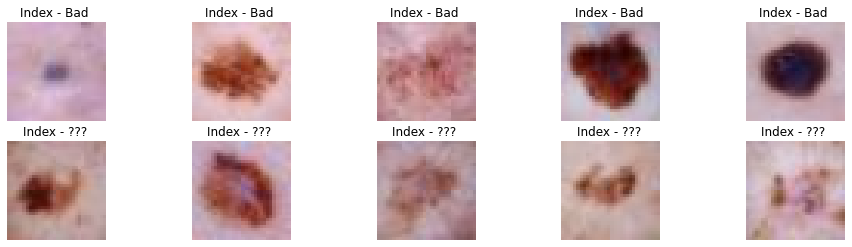

In [65]:
SAMPLE_SIZE = 5

plt.figure(figsize=(16,4))

# random.choice(numberList)
obj1 = LabeledImagesDataSet(BASE_DIR + '/labeled')

obj2 = UnlabeledImagesDataSet(BASE_DIR + '/labeled')

for idx in range( SAMPLE_SIZE):
  labeledItem = random.choice(obj1)
  unlabeledItem = random.choice(obj2)
  labeledStatus = ('Good' if labeledItem[0] == 0 else 'Bad')
  unlabeledStatus = '???'
  plt.subplot(2, 5, idx + 1, title= f'Index - {labeledStatus} ')
  plt.axis('off')
  plt.imshow(labeledItem[1])
  plt.subplot(2, 5, idx + 6, title= f'Index - {unlabeledStatus} ')
  plt.axis('off')
  plt.imshow(unlabeledItem)


### CODE: DataLoaders unlabeled and labeled


Images Info's Labeled:
torch.Size([64, 32, 32, 3])
torch.Size([32, 32, 3])
torch.Size([32, 3])

Images Info's Unlabeled:
torch.Size([64, 32, 32, 3])
torch.Size([32, 32, 3])
torch.Size([32, 3])


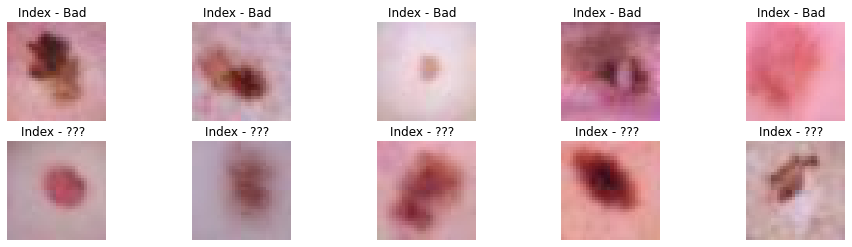

In [84]:
plt.figure(figsize=(16,4))

labeledDataSet = LabeledImagesDataSet(BASE_DIR + '/labeled')
unlabeledDataSet = UnlabeledImagesDataSet(BASE_DIR + '/unlabeled')

labeledDataloader = torch.utils.data.DataLoader(labeledDataSet, batch_size=64, shuffle=True)
unlabeledDataloader = torch.utils.data.DataLoader(unlabeledDataSet, batch_size=64, shuffle=True)

dataIter1 = iter(labeledDataloader)
labels1, images1  = dataIter1.next()

dataIter2 = iter(labeledDataloader)
labels2, images2  = dataIter2.next()

print('\nImages Info\'s Labeled:')
print(images1.shape)
print(images1[0].shape)
print(images1[0][0].shape)
print('\nImages Info\'s Unlabeled:')
print(images2.shape)
print(images2[0].shape)
print(images2[0][0].shape)

for idx in range( SAMPLE_SIZE ):
  labeledItem = (labels1[idx], images1[idx],)
  unlabeledItem = (labels2[idx], images2[idx])
  labeledStatus = ('Good' if labeledItem[0] == 0 else 'Bad') + f' '
  unlabeledStatus = '??? ' 
  plt.subplot(2, 5, idx + 1, title= f'Index - {labeledStatus} ')
  plt.axis('off')
  plt.imshow(labeledItem[1])
  plt.subplot(2, 5, idx + 6, title= f'Index - {unlabeledStatus} ')
  plt.axis('off')
  plt.imshow(unlabeledItem[1])